In [1]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "wUTAs4WCnwRA2PVvz_vd"

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [4]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [5]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [6]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [8]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [9]:
# 30% in apple
# 20% in cisco
# 40% in amazon 
# 10% in IBM
list(zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   52.848787       1.000000
  2012-01-04   53.132802       1.005374
  2012-01-05   53.722681       1.016536
  2012-01-06   54.284287       1.027162
  2012-01-09   54.198183       1.025533
  ...                ...            ...
  2016-12-23  115.080808       2.177549
  2016-12-27  115.811668       2.191378
  2016-12-28  115.317843       2.182034
  2016-12-29  115.288214       2.181473
  2016-12-30  114.389454       2.164467
  
  [1258 rows x 2 columns],
  0.3),
 (            Adj. Close  Normed Return
  Date                                 
  2012-01-03   15.617341       1.000000
  2012-01-04   15.919125       1.019324
  2012-01-05   15.860445       1.015566
  2012-01-06   15.801764       1.011809
  2012-01-09   15.902359       1.018250
  ...                ...            ...
  2016-12-23   29.475311       1.887345
  2016-12-27   29.620129       1.896618
  2016-12-28   29.369111       1.880545
  

In [10]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [11]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [12]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [13]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [14]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [15]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [16]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos' ]

In [17]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [18]:
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

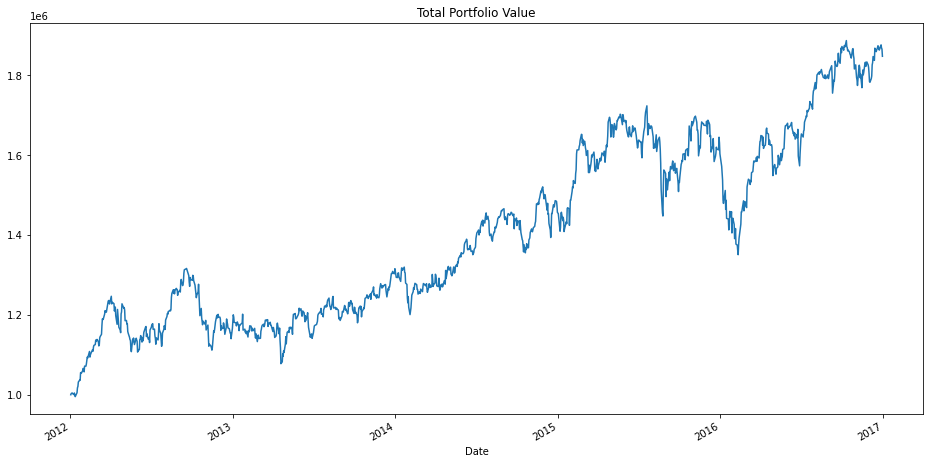

In [20]:
portfolio_val['Total Pos'].plot(figsize=(16,8))
plt.title('Total Portfolio Value');

<AxesSubplot:xlabel='Date'>

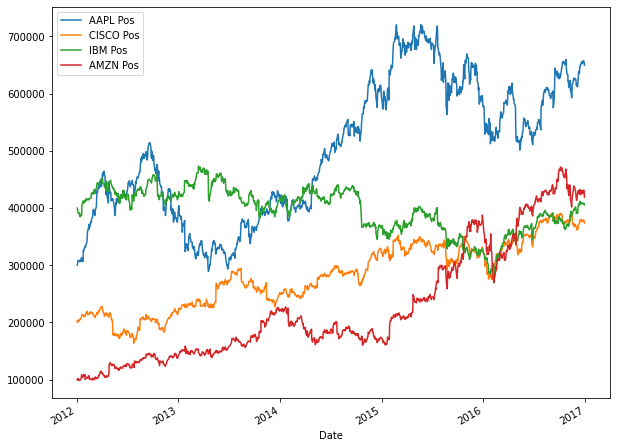

In [21]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10, 8))

In [22]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [23]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [24]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [25]:
portfolio_val['Daily Return'].std()

0.010568287769161725

<AxesSubplot:ylabel='Density'>

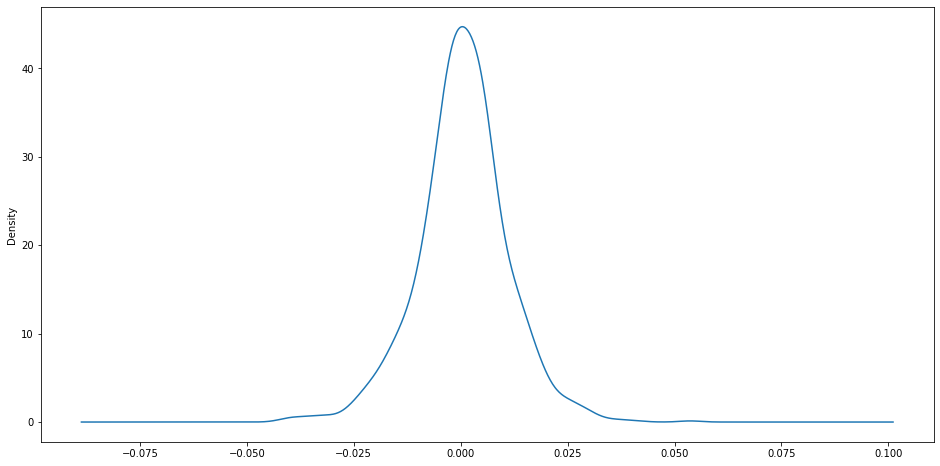

In [26]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(16,8))

In [27]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [28]:
cumulative_return

84.74285181665545

In [29]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [30]:
SR

0.05149680662648089

In [31]:
ASR = (252**0.5) * SR

In [32]:
ASR

0.817486461885909